In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
game_df = pd.read_json('bgg_database.json')
game_df = game_df.set_index('rank')

In [3]:
game_df = game_df.sort_index()
game_df.head()

,attributes,average_rating,description,last_updated,name,num_voters,play_time,player_count,ratings,weight,weighted_rating,year
rank,,,,,,,,,,,,
1,"{u'boardgamedesigner': u'Isaac Childres', u'bo...",8.91773,Gloomhaven is a game of Euro-inspired tactica...,Tue Jan 29 19:59:01 2019,Gloomhaven,22060,120,"{u'1': {u'Recommended': u'256', u'Not Recommen...","{u'pinbot': u'9', u'ladenedge': u'10', u'thesp...",3.7726,8.61765,2017
2,"{u'boardgamedesigner': u'Matt Leacock', u'boar...",8.65079,Pandemic Legacy is a co-operative campaign gam...,Tue Jan 29 19:19:28 2019,Pandemic Legacy: Season 1,29551,60,"{u'1': {u'Recommended': u'61', u'Not Recommend...","{u'jocar84': u'9.5', u'horgboth': u'9', u'DerS...",2.8327,8.49355,2015
3,"{u'boardgamedesigner': u'Vlaada Chvátil', u'bo...",8.55342,Through the Ages: A New Story of Civilization ...,Tue Jan 29 21:06:14 2019,Through the Ages: A New Story of Civilization,14683,120,"{u'1': {u'Recommended': u'5', u'Not Recommende...","{u'the_ka': u'8', u'jmwillis5': u'9.37', u'Doe...",4.3722,8.27274,2015
4,"{u'boardgamedesigner': u'Jacob Fryxelius', u'b...",8.39757,"In the 2400s, mankind begins to terraform the ...",Tue Jan 29 18:16:41 2019,Terraforming Mars,34848,120,"{u'1': {u'Recommended': u'413', u'Not Recommen...","{u'jocar84': u'9', u'andi13': u'8', u'hankick'...",3.2360,8.22919,2016
5,"{u'boardgamedesigner': u'Jason Matthews', u'bo...",8.32935,"&quot;Now the trumpet summons us again, not as...",Tue Jan 29 19:19:28 2019,Twilight Struggle,33387,180,"{u'1': {u'Recommended': u'22', u'Not Recommend...","{u'wooda': u'8', u'andi1977': u'10', u'Elirirz...",3.5622,8.18192,2005


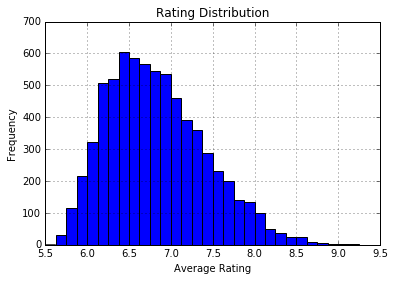

In [4]:
game_df.hist('average_rating', bins = np.linspace(5.5, 9.5, 33))
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

Because we are only observing the top 7000 games in this data set, we can see that the ratings are right-skewed.  It is very likely that we would see a more prominent left-tail if we were looking at more games, but it is also likely that the skew is due to other factors.  Perhaps users are hesitant to give very low scores or perhaps very low-quality games never had enough popularity for users to vote on them.

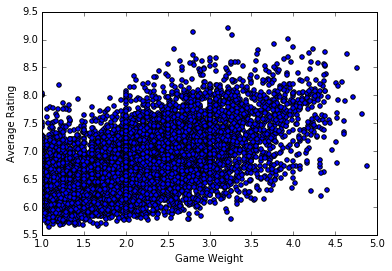

In [6]:
plt.scatter(game_df.weight, game_df.average_rating)
plt.axis([1,5,5.5,9.5])
plt.xlabel('Game Weight')
plt.ylabel('Average Rating')
plt.show()

We can consider some possible predictors for average game score.  The 'weight' of the game is a user-voted value between 1 and 5 that describes how complex a game is to learn and play.  We can see from this plot that there is a positive trend of higher weight games scoring higher average ratings, but the trend is rather weak.

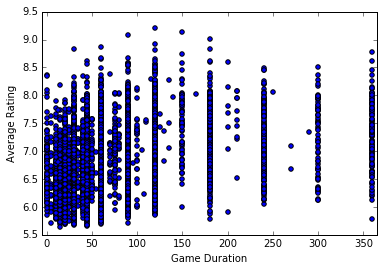

In [7]:
plt.scatter(game_df.play_time, game_df.average_rating)
plt.xlabel('Game Duration')
plt.ylabel('Average Rating')
plt.axis([-5, 365, 5.5, 9.5])
plt.show()

We can also consider how lengthy a game is to play.  However, there is no clear trend here; it would seem duration of a game does not have a substantial effect on rating.

For a recommender system, we are not solely concerned with the overall ratings of these games.  We are particularly interested in how individuals rate games.  To gain insights into that, we can observe the distributions for individual games.

In [9]:
ratings_df = pd.read_json('ratings.json')

In [10]:
ratings_df.head()

,name,score,user
0,Die Macher,10.0,aSoso
1,Die Macher,7.0,Annagul
10,Die Macher,8.0,Rygel
100,Die Macher,8.7,Trogdor2
1000,Die Macher,9.0,gutrie_es


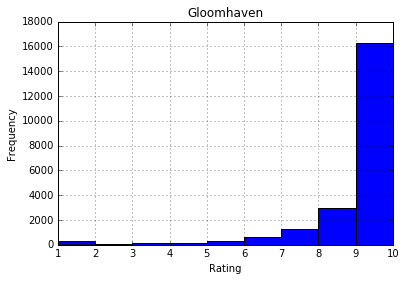

In [14]:
ratings_df[ratings_df.name=='Gloomhaven'].hist('score',bins = np.linspace(1, 10, 10))
plt.title('Gloomhaven')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

First looking at *Gloomhaven*, the top rated game in our data set, we can see a mode of value-10 rating with the frequency of lower scores descreasing.  However, scores of value-1 are substantial.  We can take a closer look at these values on a log-scale.

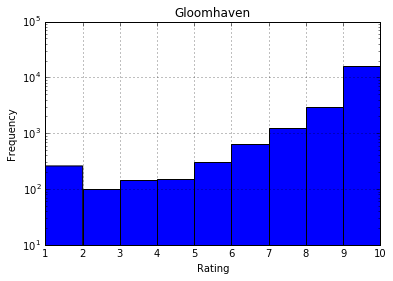

In [15]:
ratings_df[ratings_df.name=='Gloomhaven'].hist('score',bins = np.linspace(1, 10, 10))
plt.yscale('log')
plt.title('Gloomhaven')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We can see that there are a large number of ratings between 1 and 2--roughly as many as between 5 and 6.  There are 2 possibilities for this: 1) these ratings are 'retaliatory' ratings for users who do not believe *Gloomhaven* should be scored as highly as it is and 2) *Gloomhaven* is a polarizing game, and many users actually dislike the game.

Polarized ratings for items in rating systems are a substantial challenge.  The most notable example is the difficulty of predicting scores for the movie *Napoleon Dynamite* during the Netflix challenge.  We can take a look at potential polarizing items in our dataset by sorting them by rating variance.  Highly polarizing items are likely to have a high variance due to the bimodality of their rating distributions.

In [16]:
ratings_df.groupby(['name']).std().sort_values('score', ascending = False).head()

,score
name,
Poisson d'Avril,3.516525
Tainted Grail: The Fall of Avalon,3.511538
Eclipse: Second Dawn for the Galaxy,2.978454
LOAD: League of Ancient Defenders,2.886488
Warhammer Age of Sigmar,2.823739


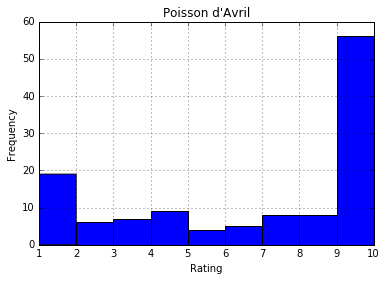

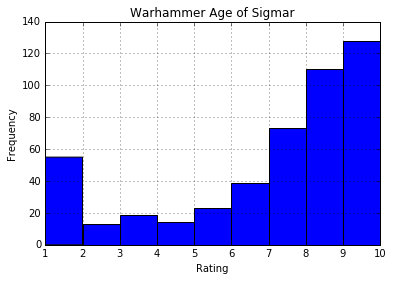

In [25]:
ratings_df[ratings_df.name=='Poisson d\'Avril'].hist('score',bins = np.linspace(1, 10, 10))
plt.title('Poisson d\'Avril')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
ratings_df[ratings_df.name=='Warhammer Age of Sigmar'].hist('score',bins = np.linspace(1, 10, 10))
plt.title('Warhammer Age of Sigmar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We can see from these plots, that the rating distributions for these games are U-shaped.  A method of addressing these polarizing ratings will need to be addressed in the final model.